In [5]:
# load metircs
import pickle
import os

save_directory = os.getcwd()

types = ['plain', 'ldp', 'phe', 'ss']
# [10, 11, 11, 10]

results = []
# print(save_directory)
for t in types:
    # file_path = os.path.join(save_directory, f'evaluate_metrics/{t}_225.pkl')
    file_path = os.path.join(save_directory, f'evaluate_metrics/cifar_{t}_225.pkl')
    tmp = None
    print(file_path)
    with open(file_path, 'rb') as file:
        tmp = pickle.load(file)
        results.append(tmp)
global_historys = [i['history']['global_history'] for i in results]

# loss 
train_loss_history = [_['loss'][0:21] for _ in global_historys]
test_acc_histroy = [_['val_accuracy'][0:21] for _ in global_historys]

# train_loss_history
converage_epochs = []
for idx, t in enumerate(types):
    converage_epochs.append(len(train_loss_history[idx]))

converage_epochs

/home/yejj/GradExperiments/chapter3/exp3_exp4/evaluate_metrics/cifar_plain_225.pkl
/home/yejj/GradExperiments/chapter3/exp3_exp4/evaluate_metrics/cifar_ldp_225.pkl
/home/yejj/GradExperiments/chapter3/exp3_exp4/evaluate_metrics/cifar_phe_225.pkl
/home/yejj/GradExperiments/chapter3/exp3_exp4/evaluate_metrics/cifar_ss_225.pkl


[20, 21, 21, 11]

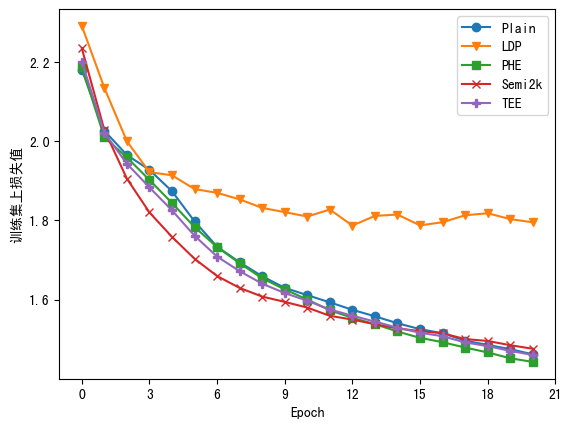

In [6]:
# mnist 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# import matplotlib.ticker as mticker
import numpy as np

categories = ['Plain', 'LDP', 'PHE', 'Semi2k', 'TEE']
markers = ['o','v','s','x','P']

train_loss_history[0].append(1.4617663)
train_loss_history[3].extend([1.5588854, 1.5494052, 1.5376215, 1.5271613, 1.5202126, 1.514849, 1.5001867, 1.4954981, 1.4847522, 1.4757663])

tee_loss = []
for i in range(21):
    temp = train_loss_history[0][i]+train_loss_history[2][i]+train_loss_history[3][i]
    tee_loss.append(round(temp/3, 7))

train_loss_history.append(tee_loss)

for idx, t in enumerate(categories):
    plt.plot(train_loss_history[idx], label=t, marker=markers[idx], markersize=6)
# plt.plot(x_values, result1, label='分层聚合', marker='o', markersize=6, markeredgecolor='black')
# plt.plot(history["global_history"]['val_loss'])
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('FLModel loss')
plt.ylabel('训练集上损失值')
plt.xlabel('Epoch')

plt.legend()
plt.show()

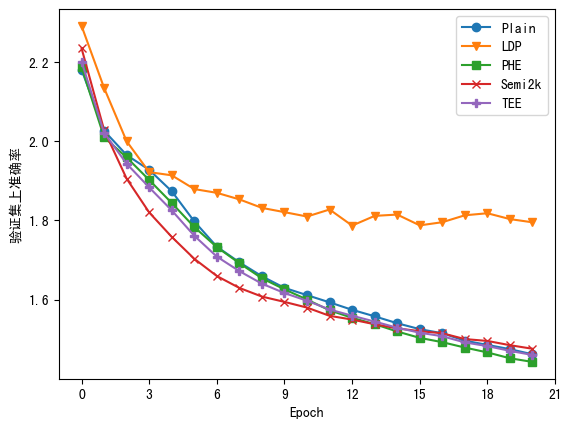

In [7]:
tee_acc = []
test_acc_histroy[0].append(0.4833)
test_acc_histroy[3].extend([0.4379, 0.4419, 0.4479, 0.4509, 0.4526, 0.454, 0.458, 0.4614, 0.461, 0.4627])

for i in range(17):
    temp = test_acc_histroy[0][i]+test_acc_histroy[2][i]+test_acc_histroy[3][i]
    tee_acc.append(round(temp/3, 7))
tee_acc.extend([0.465, 0.4644, 0.469, 0.4707])
test_acc_histroy.append(tee_acc)

for idx, t in enumerate(['Plain', 'LDP', 'PHE', 'Semi2k','TEE']):
    # plt.plot(test_acc_histroy[idx], label=t)
    plt.plot(train_loss_history[idx], label=t, marker=markers[idx], markersize=6)
# plt.plot(history["global_history"]['val_loss'])
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('FLModel loss')
plt.ylabel('验证集上准确率')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Valid'], loc='upper left')
# plt.title('聚合')

plt.legend()
plt.show()

In [8]:
print(test_acc_histroy[0])
print(test_acc_histroy[3])

[0.2341, 0.2795, 0.2989, 0.3184, 0.3427, 0.3761, 0.3954, 0.4109, 0.4234, 0.4263, 0.4355, 0.4434, 0.4491, 0.457, 0.4572, 0.4637, 0.4674, 0.4717, 0.4762, 0.4788, 0.4833]
[0.1999, 0.2882, 0.3252, 0.3529, 0.3727, 0.3979, 0.4116, 0.4221, 0.4306, 0.4373, 0.4429, 0.4379, 0.4419, 0.4479, 0.4509, 0.4526, 0.454, 0.458, 0.4614, 0.461, 0.4627]
